In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert categorical data to numerical data
# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert Gender Strings to Numbers: Male to 1 and Female to 0
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

In [117]:
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']
# bmi = data['BMI']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

In [118]:
# linear regression model

# mseTrainSum, mseTestSum, r2TrainSum, r2TestSum = 0, 0, 0, 0
# epochs = 100

# for i in range(1, epochs+1):

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_test.shape, y_test.shape)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

# # Calculate MSE & R^2
# mseTrain, mseTest = mean_squared_error(y_train, y_trainPred), mean_squared_error(y_test, y_testPred)
# r2Train, r2Test = r2_score(y_train, y_trainPred), r2_score(y_test, y_testPred)

#     # Add to the average
#     mseTrainSum += mseTrain
#     mseTestSum += mseTest
#     r2TrainSum += r2Train
#     r2TestSum += r2Test

# # Print results
# print("Results for Linear Regression Model")
# print(f'\nAverage Train MSE: {mseTrainSum / epochs}')
# print(f'Average Train R^2: {r2TrainSum / epochs }\n')
# print(f'Average Test MSE: {mseTestSum / epochs}')
# print(f'Average Test R^2: {r2TestSum / epochs}')

(75, 2) (75,)


In [125]:
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores for 15 folds
r2Train = cross_val_score(lr, X_train, y_train, cv=15, scoring='r2')
mseTrain = -1 * cross_val_score(lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error')
r2Test = cross_val_score(lr, X_test, y_test, cv=15, scoring='r2')
mseTest = -1 * cross_val_score(lr, X_test, y_test, cv=15, scoring='neg_mean_squared_error')

print(f'Mean Squared Error Train: {mseTrain}\n')
print(f'R^2 Train: {r2Train}\n')

print(f'Average Mean Squared Error Train: {np.mean(mseTrain)}')
print(f'Average R^2 Train: {np.mean(r2Train)}\n')

print(f'Mean Squared Error Test: {mseTest}\n')
print(f'R^2 Test: {r2Test}\n')

print(f'Average Mean Squared Error Test: {np.mean(mseTest)}')
print(f'Average R^2 Test: {np.mean(r2Test)}')

Mean Squared Error Train: [0.38765647 0.66759824 0.7177494  0.60043859 0.22522954 0.90515107
 0.5899842  0.50376187 0.61649635 0.73164602 0.53155787 0.60730497
 0.59792499 0.57884299 0.71491697]

R^2 Train: [0.88689819 0.80705253 0.75335072 0.73893974 0.93148911 0.49432901
 0.69391222 0.77384428 0.80366358 0.79035931 0.83111743 0.78232797
 0.75368693 0.83270434 0.80238512]

Average Mean Squared Error Train: 0.598417303155282
Average R^2 Train: 0.778404032191539

Mean Squared Error Test: [0.31030485 1.03679469 0.17031137 0.63508192 0.29830568 1.428924
 0.3694996  0.35380303 2.27908212 0.2721348  0.13651204 1.15496267
 0.74621495 0.5828907  1.02122561]

R^2 Test: [ 0.92681489  0.53714523  0.93548812  0.0076845   0.88347434 -0.05067941
  0.8152502   0.73985071 -0.13954106  0.94922858  0.96718461  0.56251414
  0.74790036  0.83055503  0.7591449 ]

Average Mean Squared Error Test: 0.7197365354589191
Average R^2 Test: 0.6314676760066817


     Sleep Duration  Sleep Quality
113             7.4              8
362             8.2              9
40              7.7              7
302             7.1              7
373             8.1              9
..              ...            ...
49              7.7              7
76              6.0              6
10              6.1              6
237             6.5              7
308             6.6              7

[299 rows x 2 columns]


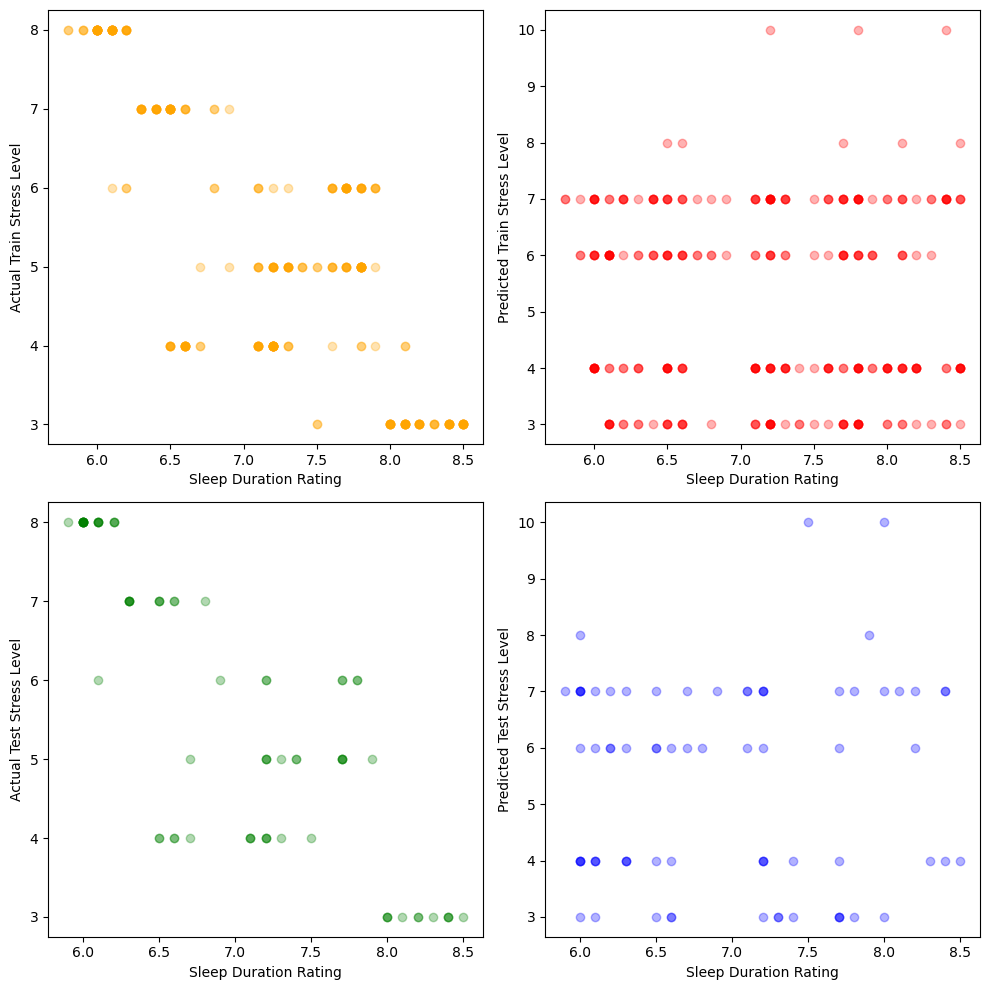

In [126]:
# Create scatterplots for train sleep duration & predicted train stress level

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

print(X_train)

# Plot Train Data vs Train Predictions
axes[0].scatter(x=X_train['Sleep Duration'], y=y_train, color='orange', alpha=0.3)
axes[0].set(xlabel='Sleep Duration Rating', ylabel='Actual Train Stress Level')
axes[1].scatter(x=X_train['Sleep Duration'], y=y_trainPred, color='red', alpha=0.3)
axes[1].set(xlabel='Sleep Duration Rating', ylabel='Predicted Train Stress Level')

# Plot Test Data vs Test Predictions
axes[2].scatter(x=X_test['Sleep Duration'], y=y_test, color='green', alpha=0.3)
axes[2].set(xlabel='Sleep Duration Rating', ylabel='Actual Test Stress Level')
axes[3].scatter(x=X_test['Sleep Duration'], y=y_testPred, color='blue', alpha=0.3)
axes[3].set(xlabel='Sleep Duration Rating', ylabel='Predicted Test Stress Level')
plt.tight_layout()
plt.show()

MLR Training Classification Report:               precision    recall  f1-score   support

           3       0.96      0.96      0.96        54
           4       0.61      0.91      0.73        53
           5       0.86      0.56      0.67        54
           6       0.88      0.79      0.83        38
           7       1.00      0.85      0.92        40
           8       0.95      1.00      0.98        60

    accuracy                           0.85       299
   macro avg       0.88      0.84      0.85       299
weighted avg       0.87      0.85      0.85       299

Accuracy: 0.8494983277591973

MLR Testing Classification Report:               precision    recall  f1-score   support

           3       1.00      1.00      1.00        17
           4       0.71      0.88      0.79        17
           5       0.80      0.62      0.70        13
           6       0.86      0.75      0.80         8
           7       1.00      0.90      0.95        10
           8       0.91      1.

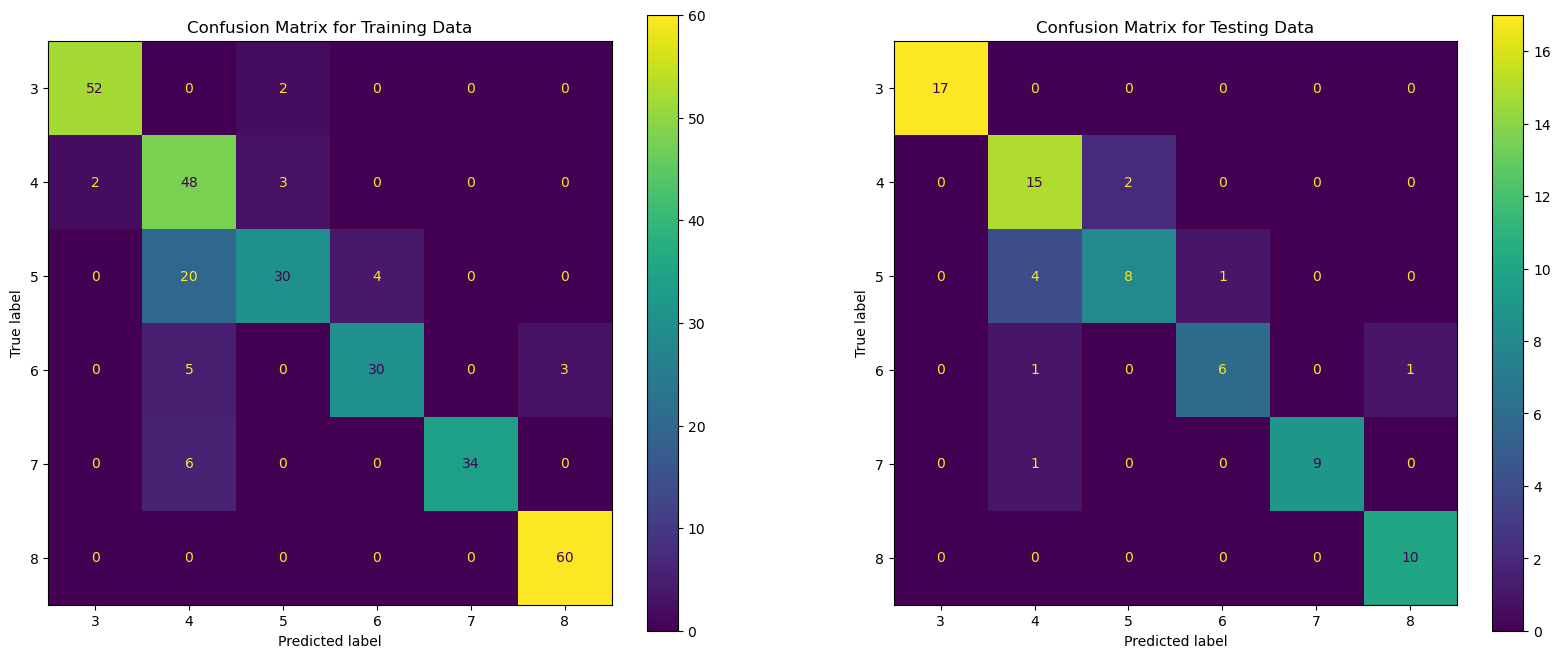

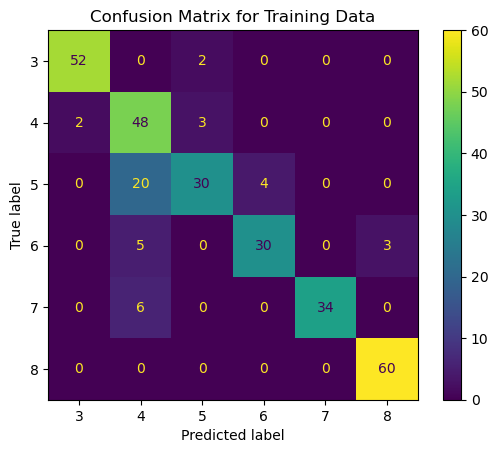

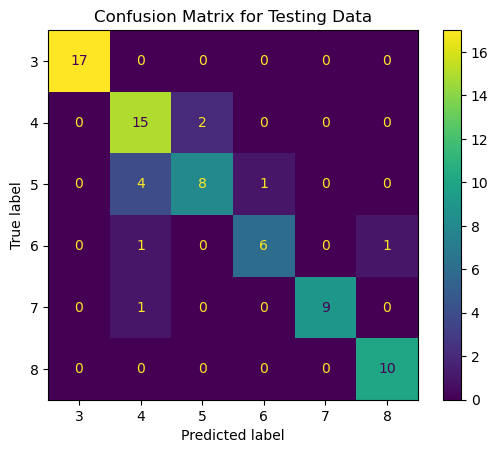

In [121]:
# logistic regression model

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression with cross validation for 10 folds
multi_logreg = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='lbfgs', max_iter=1000, refit=True)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('MLR Training Classification Report:',
      classification_report(y_train, y_trainPredmulti))
print(f'Accuracy: {accuracy_score(y_train, y_trainPredmulti)}\n')

print('MLR Testing Classification Report:',
      classification_report(y_test, y_testPredmulti))
print(f'Accuracy: {accuracy_score(y_test, y_testPredmulti)}')

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

NB Classification Train Report:               precision    recall  f1-score   support

           3       0.98      0.96      0.97        57
           4       0.75      0.23      0.35        53
           5       0.55      0.90      0.68        52
           6       0.88      0.83      0.85        42
           7       0.86      0.90      0.88        40
           8       0.93      1.00      0.96        55

    accuracy                           0.80       299
   macro avg       0.82      0.80      0.78       299
weighted avg       0.82      0.80      0.78       299

Train Accuracy: 0.802675585284281

NB Classification Test Report:               precision    recall  f1-score   support

           3       0.93      1.00      0.97        14
           4       0.71      0.29      0.42        17
           5       0.57      0.87      0.68        15
           6       0.60      0.75      0.67         4
           7       0.80      0.80      0.80        10
           8       1.00      1.00 

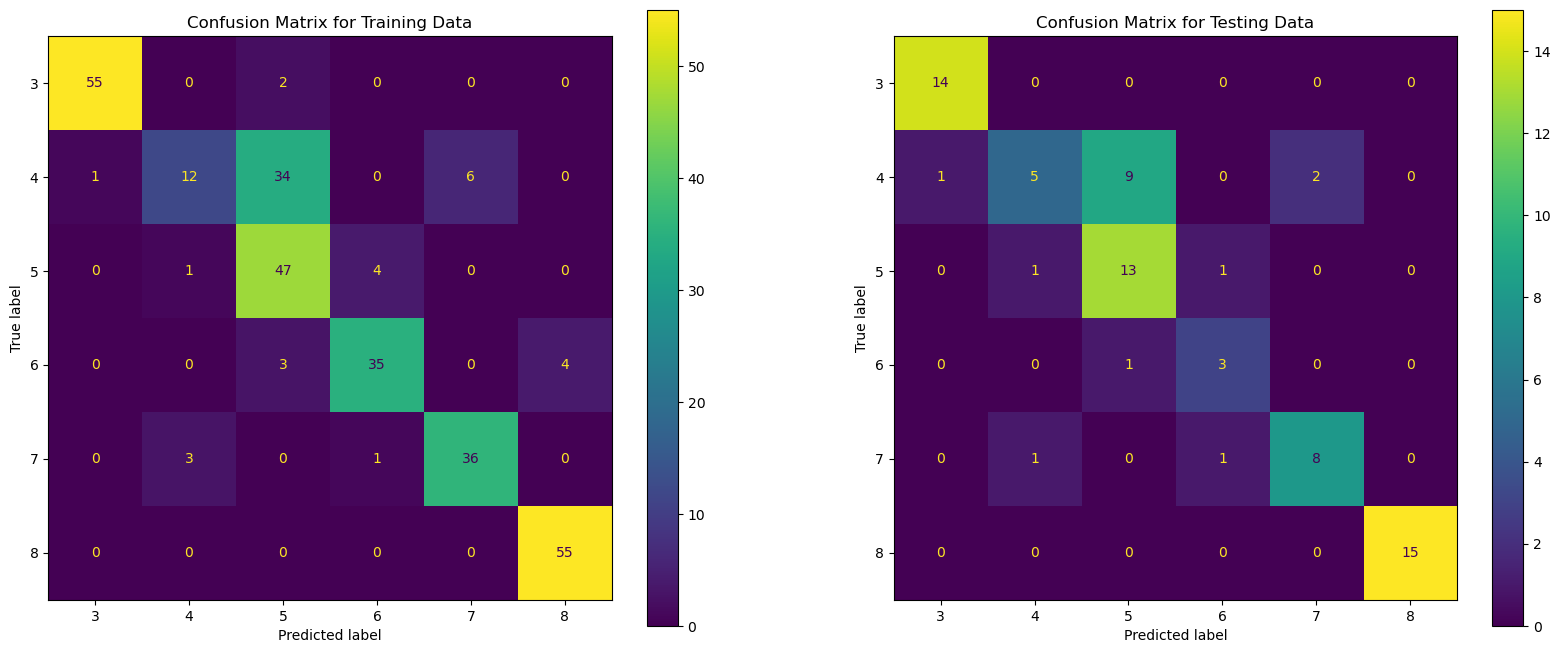

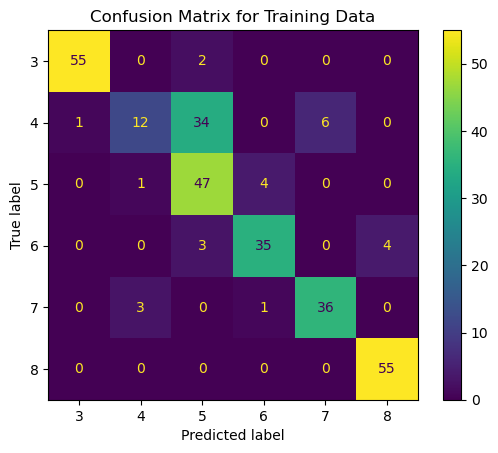

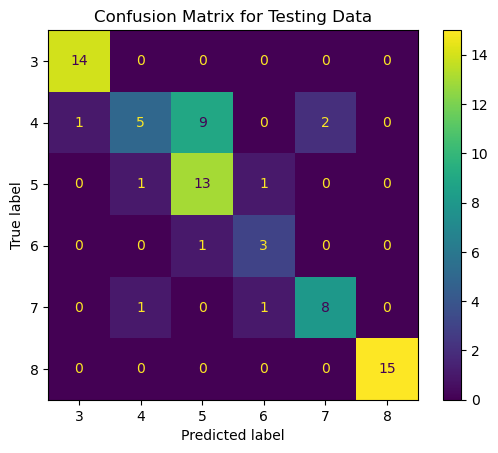

In [122]:
# naive bayes classification

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use Naive Bayes to predict on train and test sets
y_trainPredNB = gnb.predict(X_train)
y_testPredNB = gnb.predict(X_test)

# display accuracy for train and test sets
print('NB Classification Train Report:',
      classification_report(y_train, y_trainPredNB))
print(f'Train Accuracy: {accuracy_score(y_train, y_trainPredNB)}\n')

print('NB Classification Test Report:',
      classification_report(y_test, y_testPredNB))
print(f'Test Accuracy: {accuracy_score(y_test, y_testPredNB)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredNB, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredNB, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

SVM Classification Train Report:               precision    recall  f1-score   support

           3       0.97      0.97      0.97        60
           4       0.62      0.89      0.73        57
           5       0.83      0.55      0.66        55
           6       0.91      0.82      0.86        38
           7       1.00      0.87      0.93        39
           8       0.94      1.00      0.97        50

    accuracy                           0.85       299
   macro avg       0.88      0.85      0.85       299
weighted avg       0.87      0.85      0.85       299

Accuracy Train: 0.8494983277591973

SVM Classification Test Report:               precision    recall  f1-score   support

           3       1.00      1.00      1.00        11
           4       0.52      0.92      0.67        13
           5       0.83      0.42      0.56        12
           6       0.80      0.50      0.62         8
           7       1.00      0.82      0.90        11
           8       0.95      1.

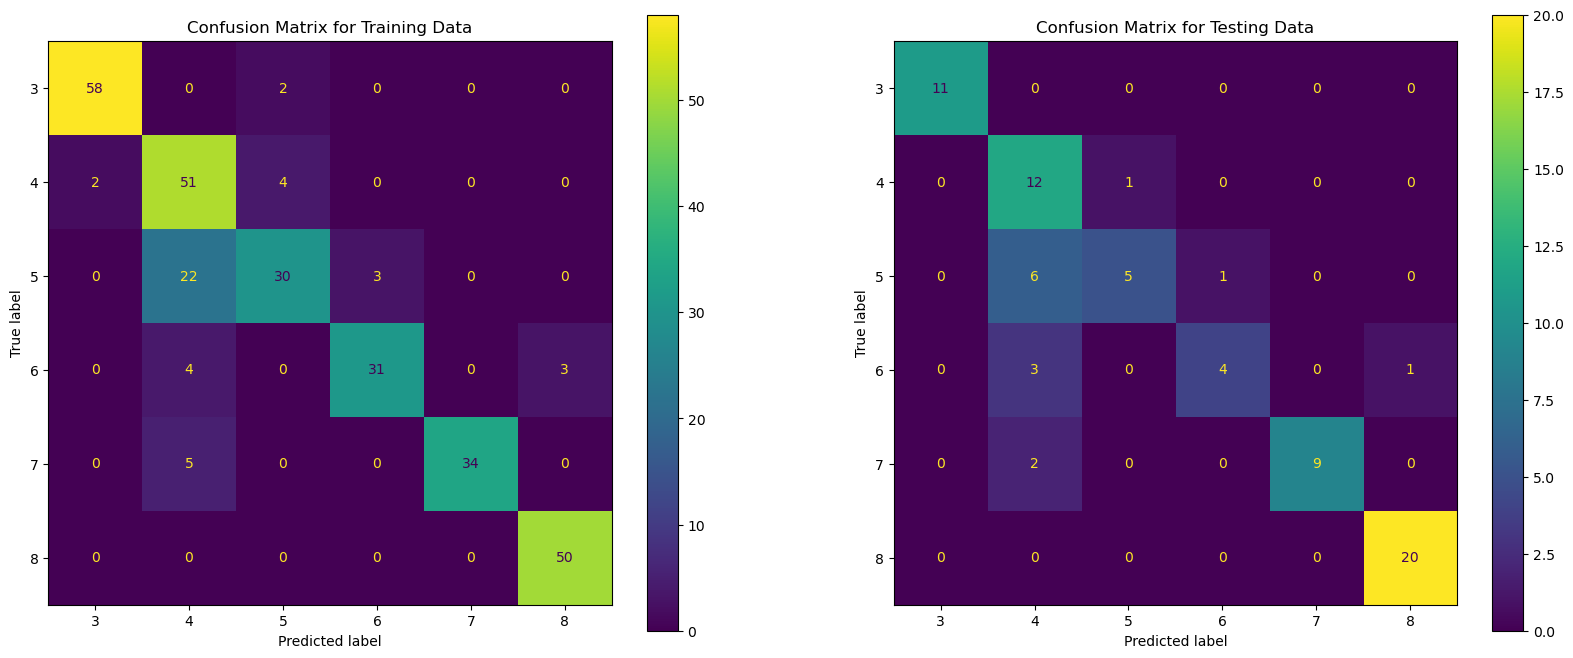

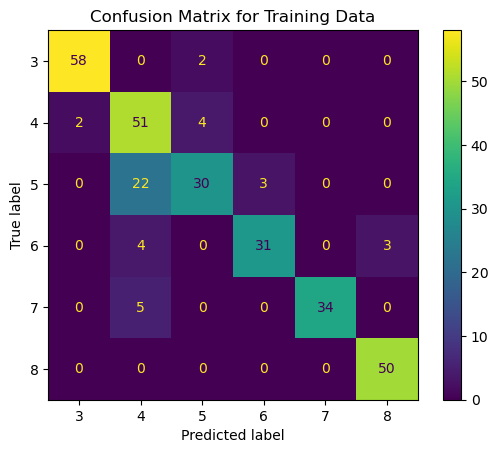

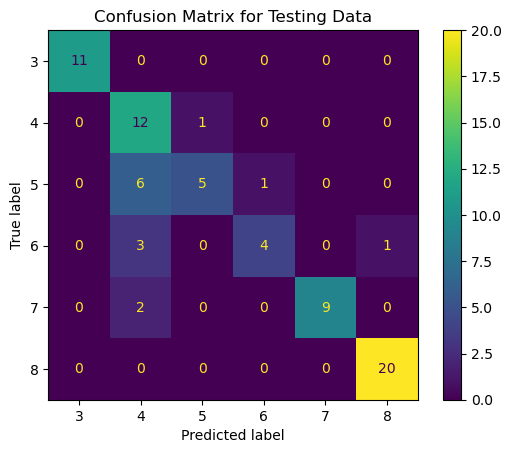

In [123]:
# creating a Support Vector Machine

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creat Support Vector Machine model
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# use SVM to predict on train and test sets
y_trainPredSVM = svm.predict(X_train)
y_testPredSVM = svm.predict(X_test)

# display accuracy for train and test sets
print('SVM Classification Train Report:',
      classification_report(y_train, y_trainPredSVM))
print(f'Accuracy Train: {accuracy_score(y_train, y_trainPredSVM)}\n')


print('SVM Classification Test Report:',
      classification_report(y_test, y_testPredSVM))
print(f'Accuracy Test: {accuracy_score(y_test, y_testPredSVM)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredSVM, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredSVM, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

# def convert_to_stress_level(x):
#       conditions = [x==0, (x > 0) & (x < 4), (x >= 4) & (x <= 7), (x > 7)]
#       choices = ["No Stress", "Low Stress", "Medium Stress", "High Stress"]

#       return np.select(conditions, choices)

# y_trainPredSVM = convert_to_stress_level(y_trainPredSVM)
# y_testPredSVM = convert_to_stress_level(y_testPredSVM)

# # Create Frequency Bar Plot for each Stress Level
# val, count = np.unique(y_trainPredSVM, return_counts=True)
# print(f'Predicted Train Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Train Values')
# plt.xlabel('Predicted Train Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)

# val, count = np.unique(y_testPredSVM, return_counts=True)
# print(f'Predicted Test Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Test Values')
# plt.xlabel('Predicted Test Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)